# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
WholesaleData = pd.read_csv('Wholesale_Data.csv')
WholesaleData

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [43]:
# checking for duplicates
WholesaleData.duplicated().value_counts()

False    440
Name: count, dtype: int64

In [44]:
# checking for nulls
WholesaleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [45]:
# checking for 0 in case nulls have been imputed that way
(WholesaleData == 0).any()

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

In [46]:
# summary statistics
WholesaleData.describe()
# the highest standard deviation is of the Fresh column

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<Axes: >

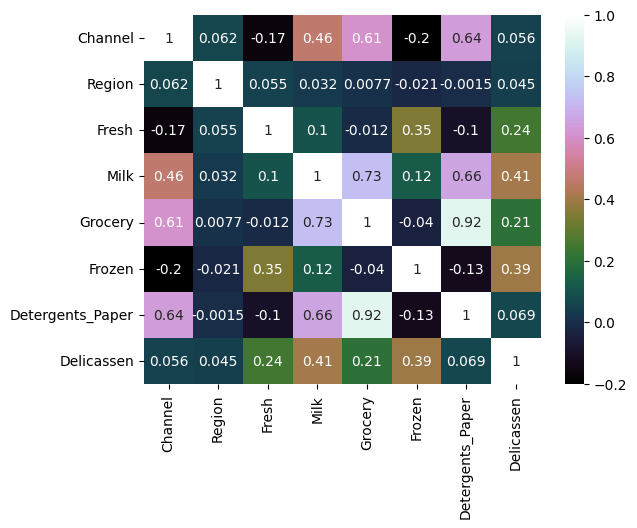

In [47]:
CorrelationMatrix = WholesaleData.corr()

sns.heatmap(CorrelationMatrix, cmap='cubehelix', annot=True)

The correlation Matrix shows that Grocery and Detergents_Paper have a 92% positive correlation. As one goes up the other does as well and the amount is 92% the same. This much correlation indicates we only need one of these two features for the model.

To see which of Grocery and Detergents_Paper I will use, I'll see which has less correlation to the other features of the model.

<Axes: >

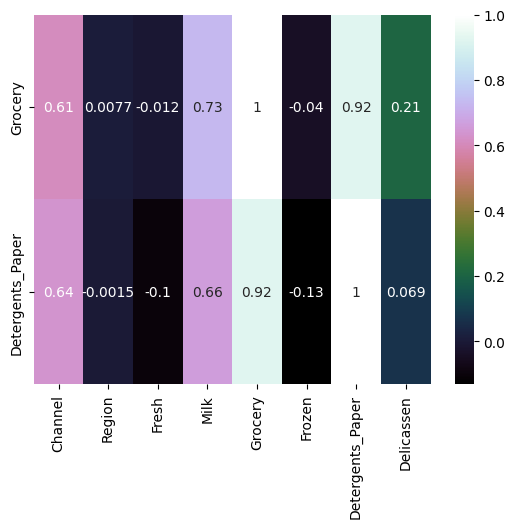

In [48]:
# focus on these two features
MvsD_PColumns = ['Grocery','Detergents_Paper']
MvsD_PCorr = CorrelationMatrix.loc[MvsD_PColumns]

sns.heatmap(MvsD_PCorr, cmap='cubehelix', annot=True)

Milk and Grocery have a relatively high correlation of 73%. And nearly all of the correlations between Detergents_Paper and the other columns are lower than those with Grocery and the other columns. The only exception is a 3% difference.

<Axes: >

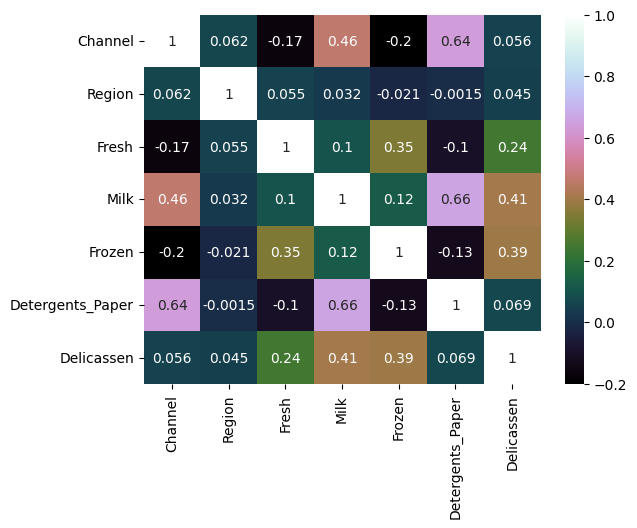

In [49]:
# dropping Grocery column due to it having higher correlations with the majority of the dataset than Detergents_Paper
RemovedGrocery = WholesaleData.drop(columns='Grocery')

# visualizing the correlation of the data
NoGroceryCorrelation = RemovedGrocery.corr()
sns.heatmap(NoGroceryCorrelation, cmap='cubehelix', annot=True)

The only remaining correlations above 50% are:
1. Detergents_Paper and Milk
2. Detergents_Paper and Channel


We can visualize the relationships between them.

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

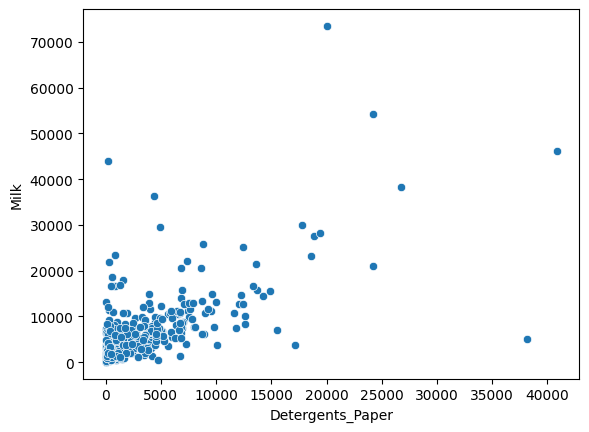

In [50]:
sns.scatterplot(data=RemovedGrocery, x='Detergents_Paper', y='Milk')

Though there does appear to be a correlation here, it's clear it's relatively low. However many of the points that prove this could be outliers. 

<Axes: xlabel='Detergents_Paper', ylabel='Channel'>

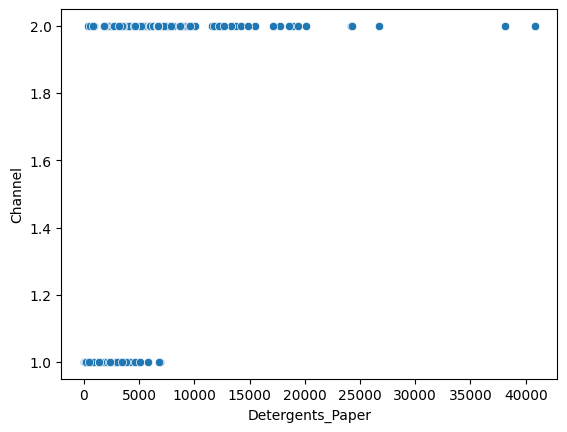

In [51]:
sns.scatterplot(data=RemovedGrocery, x='Detergents_Paper', y='Channel')

The values for Channel 1 seem to be clustered far more than those of Channel 2.

With these observations in mind I want to see the values for each column and then revisit correlation.

<Axes: xlabel='Channel', ylabel='Count'>

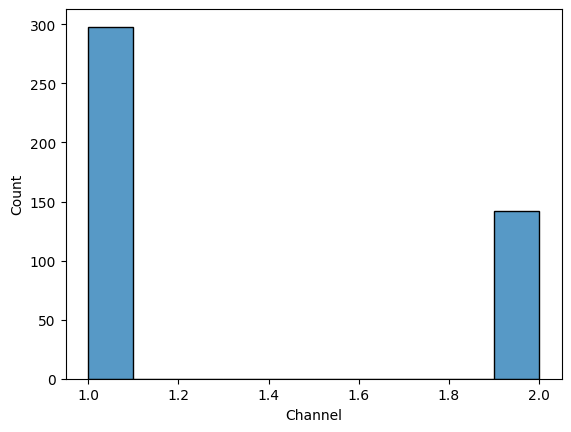

In [52]:
sns.histplot(data=RemovedGrocery, x='Channel')

Channel 2 has about half the vaues that Channel 1 has. Though this does seem to reflect a real situation this could skew results.

<Axes: xlabel='Region', ylabel='Count'>

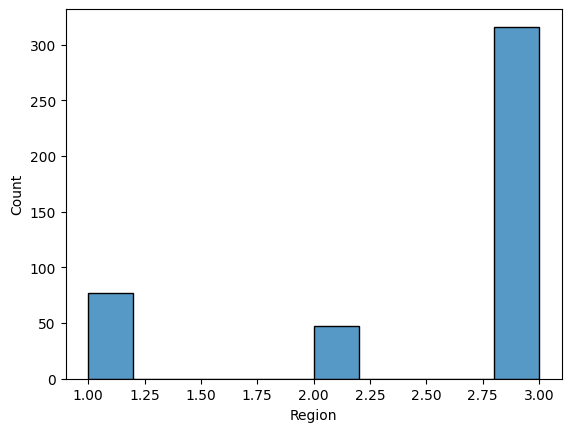

In [53]:
sns.histplot(data=RemovedGrocery, x='Region')

Over 3/4 of the data has values that are from Region 3.

<Axes: xlabel='Fresh'>

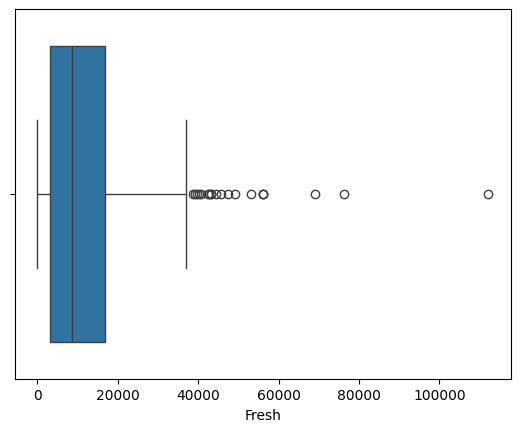

In [54]:
sns.boxplot(data=RemovedGrocery, x='Fresh')

There are outliers identified after around 40,000.

<Axes: xlabel='Milk'>

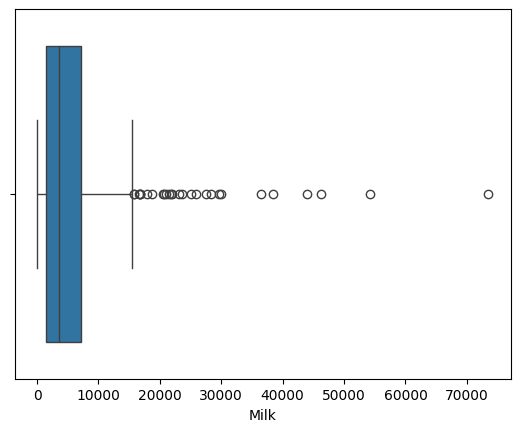

In [55]:
sns.boxplot(data=RemovedGrocery, x='Milk')

There are outliers identified after around 15,000.

<Axes: xlabel='Frozen'>

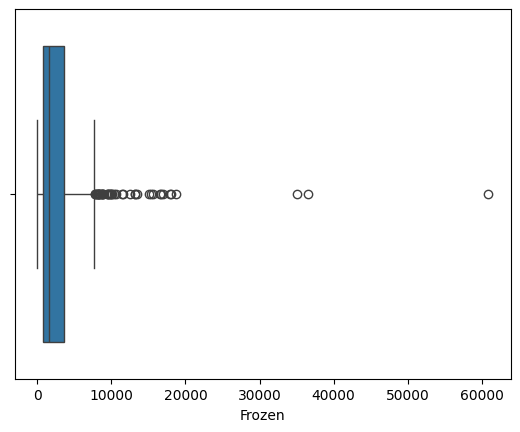

In [56]:
sns.boxplot(data=RemovedGrocery, x='Frozen')

There are outliers identified after around 9,000.

<Axes: xlabel='Detergents_Paper'>

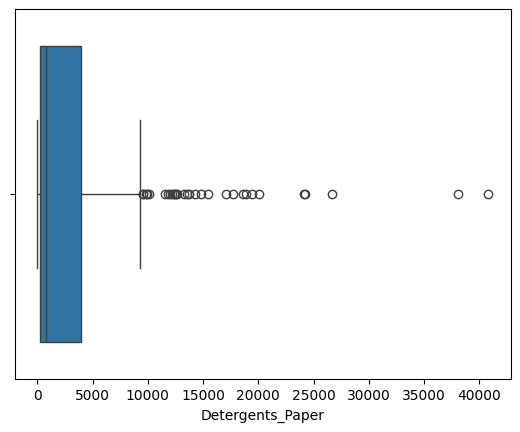

In [57]:
sns.boxplot(data=RemovedGrocery, x='Detergents_Paper')

There are outliers identified after around 10,000.

<Axes: xlabel='Delicassen'>

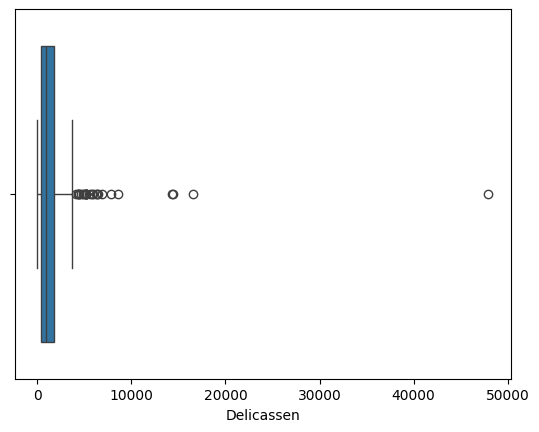

In [58]:
sns.boxplot(data=RemovedGrocery, x='Delicassen')

There are outliers identified after around 5,000.

In [59]:
print(RemovedGrocery['Channel'])

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64


In [60]:
RemovedGrocery

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,214,2674,1338
1,2,3,7057,9810,1762,3293,1776
2,2,3,6353,8808,2405,3516,7844
3,1,3,13265,1196,6404,507,1788
4,2,3,22615,5410,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,3,29703,12051,13135,182,2204
436,1,3,39228,1431,4510,93,2346
437,2,3,14531,15488,437,14841,1867
438,1,3,10290,1981,1038,168,2125


In [4]:
# removing outliers based on boxplot findings of IQR
def RemoveOutliers(DataFrame):
    '''
    Removes outliers that fall outside of the IQR.

    Args:
        DataFrame (DataFrame): the DataFrame

    Returns: the DataFrame with dropped outliers that fall outside of the IQR.

    
    '''
    # keeping track of non-outliers
    KeepData = pd.Series(True, index=DataFrame.index)

    for column in DataFrame.select_dtypes(include=['int64']):
        Q1 = DataFrame[column].quantile(0.25)
        Q3 = DataFrame[column].quantile(0.75)
        IQR = Q3 - Q1
        Lower = Q1 - 1.5 * IQR
        Upper = Q3 + 1.5 * IQR

        # marking rows with outliers
        KeepData &= (DataFrame[column] > Lower) & (DataFrame[column] < Upper)

    # keeping non-outliers
    return DataFrame[KeepData]


In [64]:
NoGroceryNoOutliers = RemoveOutliers(RemovedGrocery)
NoGroceryNoOutliers

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,214,2674,1338
1,2,3,7057,9810,1762,3293,1776
3,1,3,13265,1196,6404,507,1788
5,2,3,9413,8259,666,1795,1451
6,2,3,12126,3199,480,3140,545
...,...,...,...,...,...,...,...
432,1,3,21117,1162,269,1328,395
433,1,3,1982,3218,1541,356,1449
434,1,3,16731,3922,688,2371,838
438,1,3,10290,1981,1038,168,2125


In [65]:
# saving cleaned data
csvPath = 'CleanedData.csv'

NoGroceryNoOutliers.to_csv(csvPath, index=False)

- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.

In [81]:
NoGroceryNoOutliers.describe()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,1.288288,2.534535,9522.051051,4128.021021,1860.321321,1980.915916,1015.681682
std,0.453648,0.785510,8162.645064,3383.999929,1706.042158,2377.879894,823.285810
min,1.000000,1.000000,3.000000,55.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,2932.000000,1364.000000,584.000000,232.000000,361.000000
50%,1.000000,3.000000,7388.000000,3088.000000,1256.000000,721.000000,772.000000
75%,2.000000,3.000000,13970.000000,6257.000000,2583.000000,3468.000000,1452.000000
max,2.000000,3.000000,37036.000000,14982.000000,7683.000000,9265.000000,3637.000000


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [3]:
# standardizing the data
Scaler = StandardScaler()
ScaledData = Scaler.fit_transform(NoGroceryNoOutliers)
ScaledData

array([[ 1.57122564,  0.59345607,  0.38611072, ..., -0.96644673,
         0.29191008,  0.39209151],
       [ 1.57122564,  0.59345607, -0.30244616, ..., -0.05771797,
         0.55261775,  0.92490664],
       [-0.63644583,  0.59345607,  0.45923615, ...,  2.66729424,
        -0.62077736,  0.93950432],
       ...,
       [-0.63644583,  0.59345607,  0.88449241, ..., -0.68819257,
         0.16429388, -0.21614495],
       [-0.63644583,  0.59345607,  0.09422248, ..., -0.48273064,
        -0.76355587,  1.34945569],
       [-0.63644583,  0.59345607, -0.82634814, ..., -1.0539148 ,
        -0.63341263, -1.17229267]])

In [4]:
# determining the optimal number of clusters using the elbow rule

def PlotDistortion(ScaledData,max_clusters = 20):
    distortions = []
    for i in range(1, max_clusters +1):
        KM = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        KM.fit(ScaledData)
        distortions.append(KM.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='.')
    plt.xticks(range(2, max_clusters + 1))
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

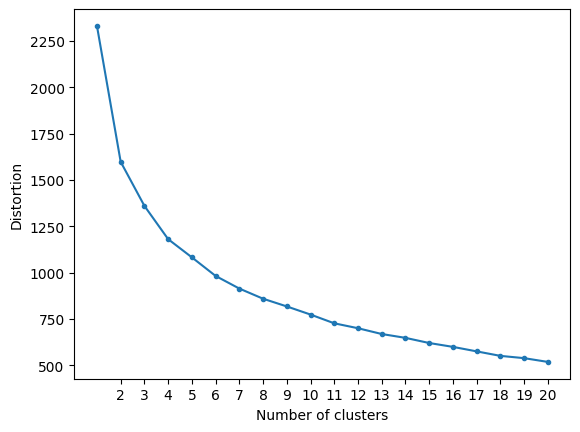

In [5]:
# elbow rule
PlotDistortion(ScaledData)

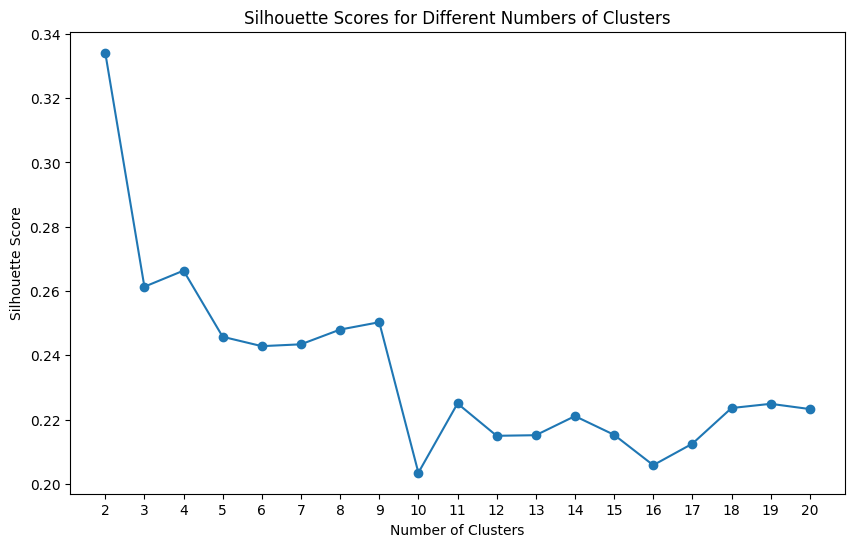

In [6]:
MaxClusters = 20 # 4 seems optimal. adding more numbers in case the curve is throwing me off
SilhoutteScores = []
# testing different clusters using silhoutte score
for NClusters in range(2, MaxClusters + 1):
    KM = KMeans(n_clusters=NClusters,
                init='k-means++',
                n_init=10,
                random_state=0)
    ClusterLabels = KM.fit_predict(ScaledData)
    SilhoutteAvg = silhouette_score(ScaledData, ClusterLabels)
    SilhoutteScores.append(SilhoutteAvg)

# plotting the silhoutte scores to find the optimal clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, MaxClusters + 1), SilhoutteScores, marker='o')
plt.xticks(range(2, MaxClusters + 1))
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [5]:
# after 7 clusters is where we start getting diminishing returns
KM = KMeans(n_clusters=2
            , n_init=10
            , random_state=0)

# fitting the model to the data
KM.fit(ScaledData)

# get the cluster labels
KClusterLabels = KM.labels_


In [6]:
NoGroceryNoOutliers['K Means'] = KClusterLabels
NoGroceryNoOutliers

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,K Means
0,2,3,12669,9656,214,2674,1338,1
1,2,3,7057,9810,1762,3293,1776,1
2,1,3,13265,1196,6404,507,1788,0
3,2,3,9413,8259,666,1795,1451,1
4,2,3,12126,3199,480,3140,545,1
...,...,...,...,...,...,...,...,...
328,1,3,21117,1162,269,1328,395,0
329,1,3,1982,3218,1541,356,1449,0
330,1,3,16731,3922,688,2371,838,0
331,1,3,10290,1981,1038,168,2125,0


<Axes: xlabel='K Means', ylabel='Count'>

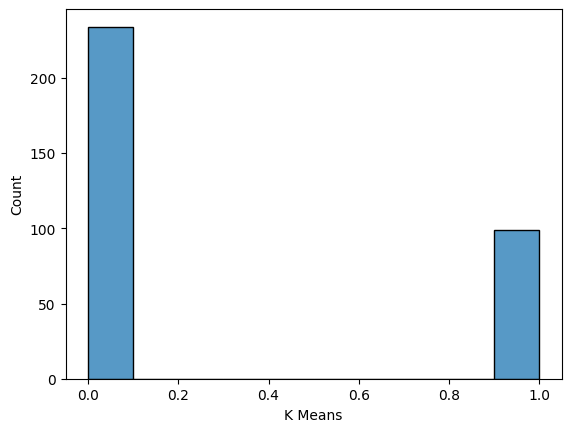

In [9]:
sns.histplot(data=NoGroceryNoOutliers, x='K Means')

Cluster 1 has less than half the values of cluster 0. The centroid created for cluster 0 has more data points closer to it than the centroid for cluster 1.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [7]:
# plot a dendrogram
def PlotDendrogram(X,method ='ward'):
    Dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

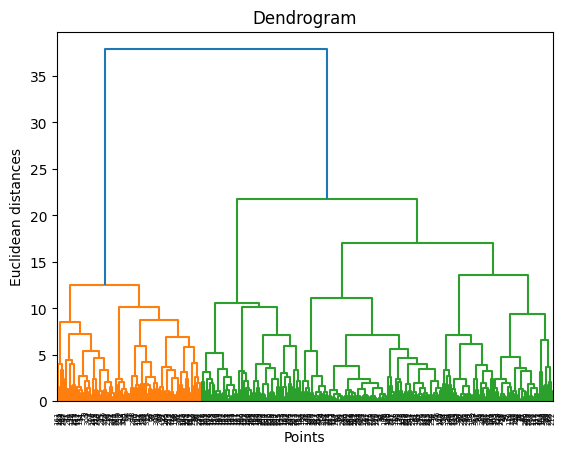

In [11]:
PlotDendrogram(ScaledData)

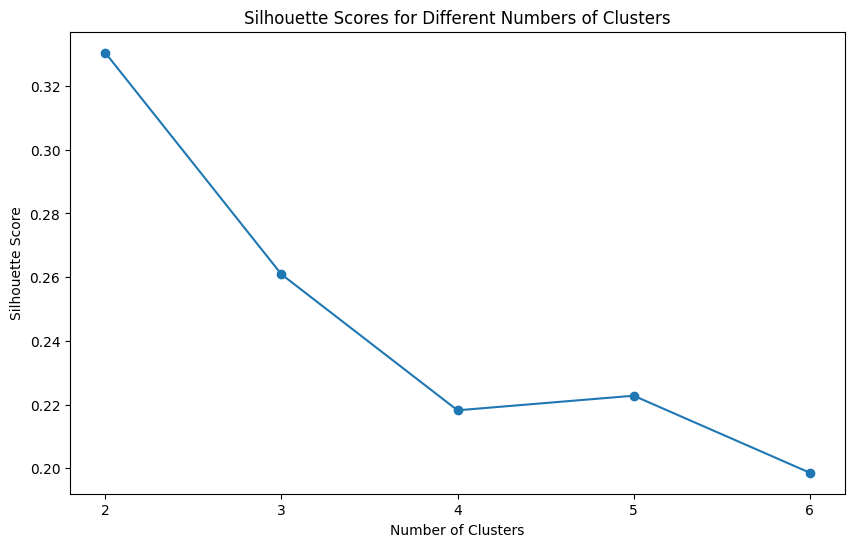

In [92]:
# looks like 2 or 3. use silhoutte score to make optimal clusters unambiguous
MaxClusters = 6 # adding more numbers in case the muddled nature is throwing me off
SilhoutteScores = []

# testing different clusters using silhoutte score
for NClusters in range(2, MaxClusters + 1):
    AC = AgglomerativeClustering(metric='euclidean'
                                 , linkage='ward'
                                 , n_clusters= NClusters)
    ClusterLabels = AC.fit_predict(ScaledData)
    SilhoutteAvg = silhouette_score(ScaledData, ClusterLabels)
    SilhoutteScores.append(SilhoutteAvg)

# plotting the silhoutte scores to find the optimal clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, MaxClusters + 1), SilhoutteScores, marker='o')
plt.xticks(range(2, MaxClusters + 1))
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [8]:
# the highest silhoutte score is from 2 clusters
AC = AgglomerativeClustering(metric='euclidean'
                             , linkage='ward'
                             , n_clusters= 2)

ACModel = AC.fit_predict(ScaledData)


# fitting the model to the data
AC.fit(ScaledData)

# get the cluster labels
AClusterLabels = AC.labels_

In [9]:
NoGroceryNoOutliers['Agglomerative'] = AClusterLabels
NoGroceryNoOutliers

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,K Means,Agglomerative
0,2,3,12669,9656,214,2674,1338,1,1
1,2,3,7057,9810,1762,3293,1776,1,1
2,1,3,13265,1196,6404,507,1788,0,0
3,2,3,9413,8259,666,1795,1451,1,1
4,2,3,12126,3199,480,3140,545,1,1
...,...,...,...,...,...,...,...,...,...
328,1,3,21117,1162,269,1328,395,0,0
329,1,3,1982,3218,1541,356,1449,0,0
330,1,3,16731,3922,688,2371,838,0,0
331,1,3,10290,1981,1038,168,2125,0,0


<Axes: xlabel='Agglomerative', ylabel='Count'>

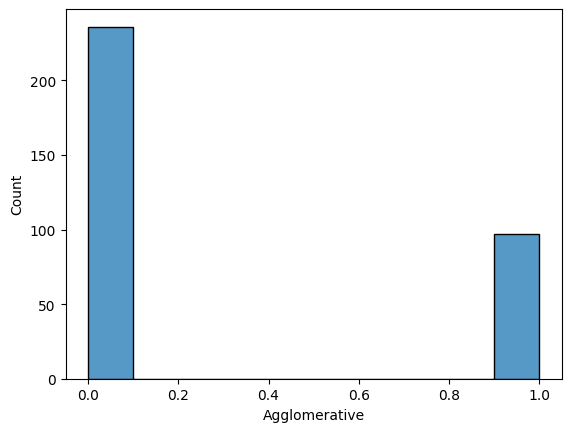

In [95]:
sns.histplot(data=NoGroceryNoOutliers, x='Agglomerative')

Cluster 1 has less than half the values of cluster 0. Points in cluster 1 are further and fewer than the rest of the data that’s in cluster 0.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [5]:
# drop the outliers but keep all columns to run PCA on
NoOutliersWholesaleData = RemoveOutliers(WholesaleData)
NoOutliersWholesaleData

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


In [6]:
# scale data for PCA
Scaler = StandardScaler()
ScalingPCA = NoOutliersWholesaleData
ScalingPCA = Scaler.fit_transform(ScalingPCA)
PrepPCA = pd.DataFrame(data=ScalingPCA,columns=NoOutliersWholesaleData.columns)
PrepPCA

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.579474,0.590092,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465
1,1.579474,0.590092,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591
2,-0.633122,0.590092,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169
3,1.579474,0.590092,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749
4,1.579474,0.590092,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949
...,...,...,...,...,...,...,...,...
327,-0.633122,0.590092,1.419665,-0.876407,-0.222926,-0.934752,-0.269195,-0.755184
328,-0.633122,0.590092,-0.928323,-0.264181,-0.871064,-0.188850,-0.683883,0.525319
329,-0.633122,0.590092,0.881474,-0.054547,0.421038,-0.689050,0.175783,-0.216984
330,-0.633122,0.590092,0.091122,-0.632529,-0.724184,-0.483809,-0.764090,1.346590


In [7]:
# set up PCA
pca = PCA(n_components=None)
WholesaleDataPCA = pca.fit(PrepPCA)

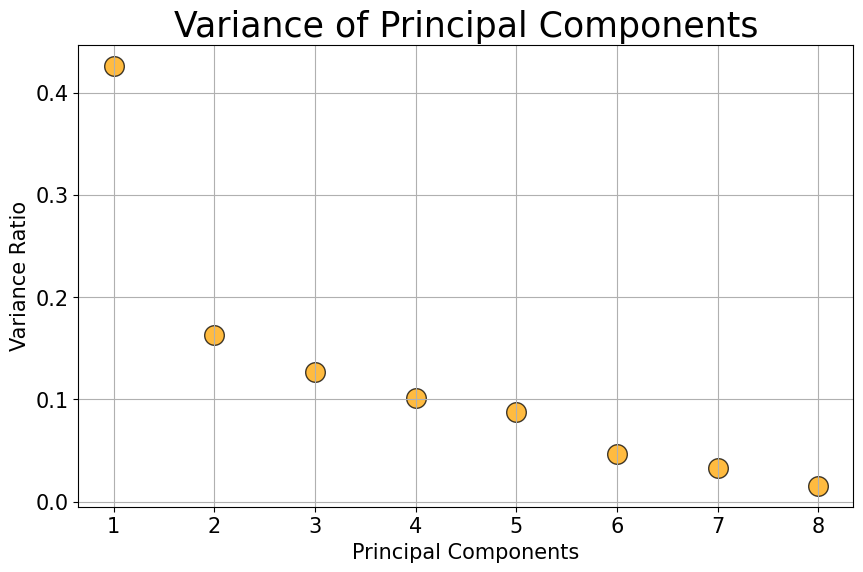

In [8]:
# plot the variance
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(WholesaleDataPCA.explained_variance_ratio_))],
            y=WholesaleDataPCA.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title('Variance of Principal Components',fontsize=25)
plt.xlabel('Principal Components',fontsize=15)
plt.xticks([i+1 for i in range(len(WholesaleDataPCA.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Variance Ratio',fontsize=15)
plt.show()

In [9]:
WholesaleDataPCA.explained_variance_ratio_

array([0.42621787, 0.16242677, 0.12699418, 0.1009474 , 0.08783354,
       0.04689437, 0.03323082, 0.01545504])

In [15]:
# PC8  accounts for about 1% of variance
# Seeing how much variance each principal component accounts for
for i in range(len(WholesaleDataPCA.explained_variance_ratio_)):
    print(f'PC{i + 1} contains {round((WholesaleDataPCA.explained_variance_ratio_[i] * 100), 2)}% of variance')

PC1 contains 42.62% of variance
PC2 contains 16.24% of variance
PC3 contains 12.7% of variance
PC4 contains 10.09% of variance
PC5 contains 8.78% of variance
PC6 contains 4.69% of variance
PC7 contains 3.32% of variance
PC8 contains 1.55% of variance


In [18]:
# if we remove PC8 
StoredRatio = 0
for i in range(len(WholesaleDataPCA.explained_variance_ratio_) - 1):
    StoredRatio += WholesaleDataPCA.explained_variance_ratio_[i] 
print(f'removing PC8 leaves us with {round((StoredRatio * 100), 2)}% of variance')

StoredRatio = 0
# if we remove Detergents_Paper as well
for i in range(len(WholesaleDataPCA.explained_variance_ratio_) - 2):
    StoredRatio += WholesaleDataPCA.explained_variance_ratio_[i] 
print(f'removing PC8 and PC7 leaves us with {round((StoredRatio * 100), 2)}% of variance')

StoredRatio = 0
# if we remove Frozen as well
for i in range(len(WholesaleDataPCA.explained_variance_ratio_) - 3):
    StoredRatio += WholesaleDataPCA.explained_variance_ratio_[i] 
print(f'removing PC8, PC7, and PC6 leaves us with {round((StoredRatio * 100), 2)}% of variance')


removing PC8 leaves us with 98.45% of variance
removing PC8 and PC7 leaves us with 95.13% of variance
removing PC8, PC7, and PC6 leaves us with 90.44% of variance


In [21]:
# transforming the data
WholesaleDataPCAResults = pca.fit_transform(PrepPCA)

# converting into a DataFrame
WholesaleDataAllPCA = pd.DataFrame(WholesaleDataPCAResults, columns=[f'PC{i + 1}' for i in range(WholesaleDataPCAResults.shape[1])])

# the first 5 principal componenets will leave us with a bit over 90% of the variation of the total dataset
WholesaleDataComponents = WholesaleDataAllPCA.iloc[:, :5]
WholesaleDataComponents

,PC1,PC2,PC3,PC4,PC5
0,2.044281,0.171793,0.796529,-0.617157,-0.326252
1,2.424172,0.467264,0.391356,0.245548,0.431963
2,-1.409707,1.993533,0.116611,1.848599,0.669723
3,1.454318,0.078813,0.752666,-0.379383,0.146284
4,1.011908,-0.596653,0.724544,-0.208136,-0.940660
...,...,...,...,...,...
327,-1.038638,-0.093446,1.108864,-0.892251,-1.261607
328,-0.916833,-0.439783,0.612475,0.046025,1.302472
329,-0.004126,0.075045,0.844440,-0.580415,-0.671628
330,-0.956743,0.520680,0.996940,-0.751765,1.233652


In [22]:
# saving dimensionality reduced data
csvPath = 'PCA.csv'

WholesaleDataComponents.to_csv(csvPath, index=False)

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [ ]:
# what does this all tell us about the data, how could we share this with interested parties?

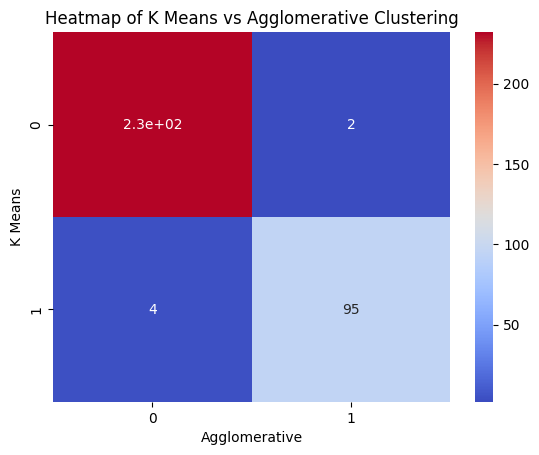

In [12]:
# getting the combinations (same cluster vs different cluster) between the 2 different clustering types
CombinationCounts = pd.crosstab(NoGroceryNoOutliers['K Means'], NoGroceryNoOutliers['Agglomerative'])

# plotting a heatmap to show the differences
sns.heatmap(CombinationCounts, annot=True, cmap='coolwarm', cbar=True)

plt.title('Heatmap of K Means vs Agglomerative Clustering')
plt.xlabel('Agglomerative')
plt.ylabel('K Means')
plt.show()
# the graph shows that the vast majority of data points are in the same cluster # for both types of clustering.

In [26]:
PercentageDataPoints = (6 / len(NoGroceryNoOutliers)) * 100
print(f'{PercentageDataPoints:.2f}% of data is categorized differently in K Means and Agglomerative')

1.80% of data is categorized differently in K Means and Agglomerative


- Grocery and Detergents_Paper have a high correlation of 92%, indicating that we only need one of these two features for the model. Information gathered based on Grocery can be used to infer things about Detergents_Paper and vice versa. The Grocery column has higher correlations with the majority of the dataset than Detergents_Paper has with the dataset, meaning there's more insight to be had from keeping Detergents_Paper and dropping Grocery.  These two avenues are highly connected.

- For both K Means Clustering and Agglomerative Clustering, cluster 1 has less than half the values of cluster 0. The centroid created for cluster 0 has more data points closer to it than the centroid for cluster 1. Points in cluster 1 are further and fewer than the rest of the data that’s in cluster 0.

- Only 6 values (1.80% of the data) don't match cluster number between K Means and Agglomerative Clustering. This indicates that all of the data except for 6 data points are close to one centroid and to other data points of the same cluster. The 6 data points that are closer to the data points around the other centroid than they are to the centroid they are closest to would have to be somewhere in the middle of the data. This indicates a clear and useful distribution of the data. 

- 90% of the data can be explained with the first 5 principal components. We can reduce the dimensions of the data from 8 to 5 to streamline the process of using the data to gain more insights in the future.
 